# Тюнинг линейной регрессии и ошибки

### О задании

В этом задании вы:
- обучите линейную регрессию, познакомитесь с метриками качества в задачах регресии

In [231]:
%pylab inline
import pandas as pd

from sklearn.base import BaseEstimator
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Часть 1. Линейная регрессия

Для начала загрузим данные и разделим их на обучающую и тестовую выборки в соотношении 7 к 3. Зачем так делать? Когда вы проверяете себя на данных на которых не обучались, вы можете быть уверены что не переобучились. Таким образом если качество на 70% датасета (оубчающей выборке) растёт, а на тестовой выборке падает, то модель начала запоминать датасет (переобучилась), вы что-то делаете не так.


In [232]:
data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7, random_state=241)

__Задание 1.__ Обучение линейной регрессии.

**(4 балла)**

Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$).

Спойлер - при большом гиперпараметре регуляризации все параметры стремятся к нулю. На графике это должно быть видно.

In [233]:
from sklearn import datasets, linear_model
from sklearn.linear_model import Ridge, Lasso
import matplotlib.pyplot as plt
import numpy as np

[  0.           0.         274.33128438  48.57203696   0.
   0.          -0.           0.         424.12142666   0.        ]
[  20.86588099  -58.00039065  231.2704688   186.67010355   33.31087207
   -2.16994737 -150.95049376  141.35036492  250.75391278  123.18025806]
7
0


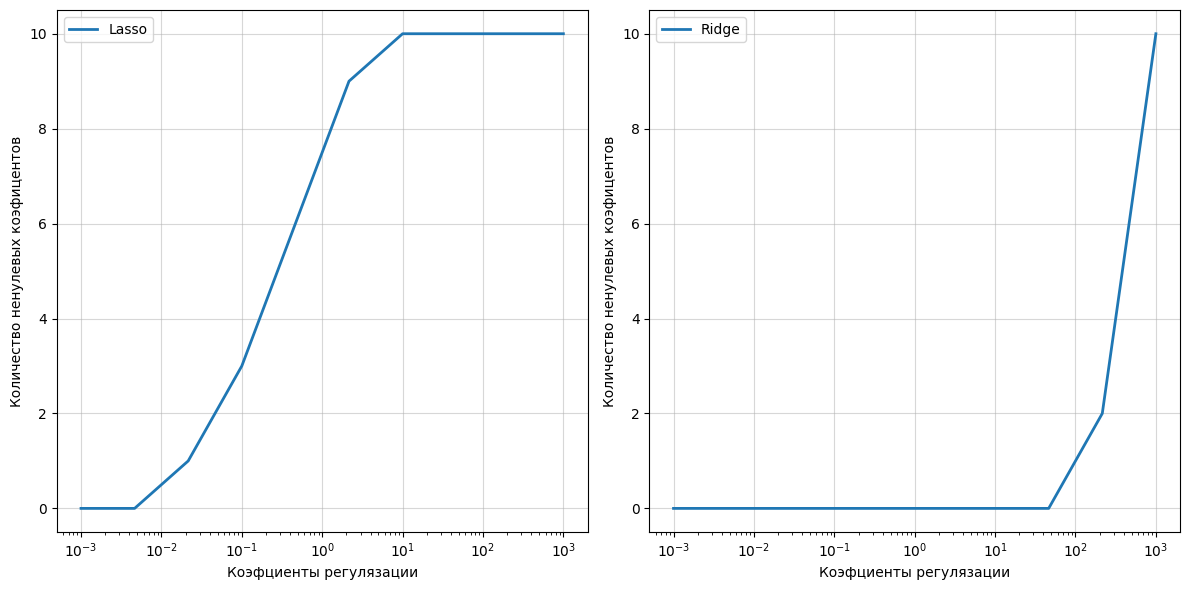

In [234]:
eps1 = 1e-1
eps2 = 1
lasso_default = Lasso()
ridge_default = Ridge()
lasso_default.fit(X_train,y_train)
ridge_default.fit(X_train,y_train)
print(lasso_default.coef_)
print(ridge_default.coef_)
print(np.sum(np.abs(lasso_default.coef_) < eps1))
print(np.sum(np.abs(ridge_default.coef_) < eps2))
alpha_space = np.logspace(-3,3,10)
lasso_space = []
ridge_space = []
for u in alpha_space:
    lasso = Lasso(u)
    ridge = Ridge(u)
    lasso.fit(X_train,y_train)
    ridge.fit(X_train,y_train)
    lasso_space.append(np.sum(np.abs(lasso.coef_) < eps1))
    ridge_space.append(np.sum(np.abs(ridge.coef_) < eps2))
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.semilogx(alpha_space,lasso_space, linewidth=2, label='Lasso')
plt.xlabel("Коэфциенты регулязации")
plt.ylabel("Количество ненулевых коэфицентов")
plt.grid(True, alpha=0.5)
plt.legend()


plt.subplot(1,2,2)
plt.semilogx(alpha_space,ridge_space, linewidth=2, label='Ridge')
plt.xlabel("Коэфциенты регулязации")
plt.ylabel("Количество ненулевых коэфицентов")
plt.grid(True, alpha=0.5)
plt.legend()

plt.tight_layout()
plt.show()



Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [235]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [236]:
ridge1 = Ridge()
ridge1.fit(X_train,y_train)
predict = ridge1.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,predict))
mae = mean_absolute_error(y_test,predict)
r2 = r2_score(y_test,predict)
print(rmse)
print()
print(mae)
print()
print(r2)


58.304295113912275

49.602750809651916

0.359902022000946


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

Качество RMSE и MAE потерь не сильно изменилось, но заметно. А вот R2 изменилось достаточно сильно.
Лучшее значение альфа для mse 0.1


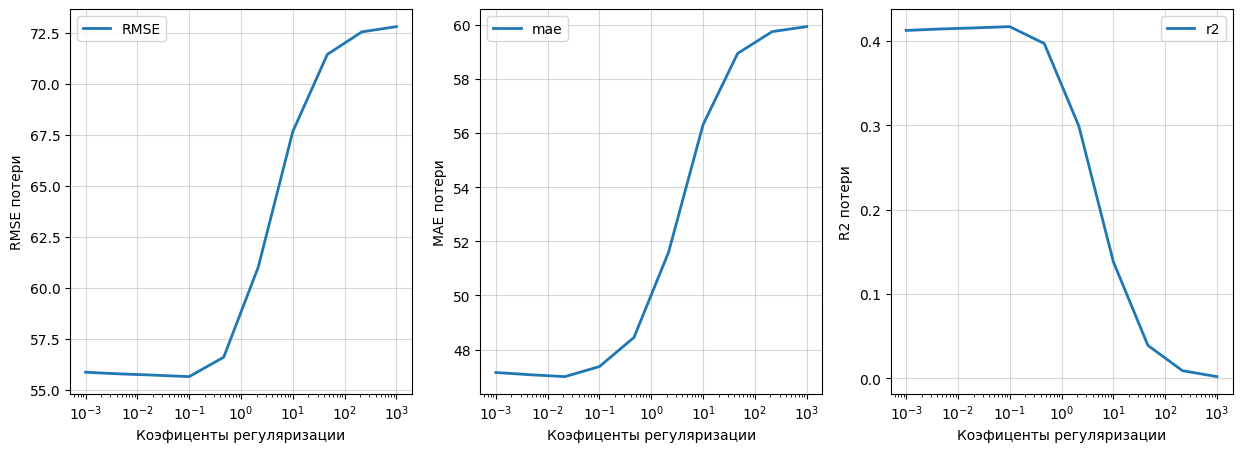

In [237]:
rmse_space = []
mae_space = []
r2_space = []
alpha_best = 0
besti = 1000
for u in alpha_space:
    ridge = Ridge(u)
    ridge.fit(X_train,y_train)
    predict = ridge.predict(X_test)
    k = np.sqrt(mean_squared_error(y_test,predict))
    rmse_space.append(np.sqrt(mean_squared_error(y_test,predict)))
    mae_space.append(mean_absolute_error(y_test,predict))
    if (k < besti):
        besti = k
        alpha_best = u
    r2_space.append(r2_score(y_test,predict))
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.semilogx(alpha_space,rmse_space,linewidth=2, label='RMSE')
plt.xlabel("Коэфиценты регуляризации")
plt.ylabel("RMSE потери")
plt.grid(True, alpha=0.5)
plt.legend()

plt.subplot(1,3,2)
plt.semilogx(alpha_space,mae_space,linewidth=2, label='mae')
plt.xlabel("Коэфиценты регуляризации")
plt.ylabel("MAE потери")
plt.grid(True, alpha=0.5)
plt.legend()

plt.subplot(1,3,3)
plt.semilogx(alpha_space,r2_space,linewidth=2, label='r2')
plt.xlabel("Коэфиценты регуляризации")
plt.ylabel("R2 потери")
plt.grid(True, alpha=0.5)
plt.legend()
print("Качество RMSE и MAE потерь не сильно изменилось, но заметно. А вот R2 изменилось достаточно сильно.")
print("Лучшее значение альфа для mse", alpha_best)

__Задание 2.__ Поиск объектов-выбросов

**(4 балла)**

Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

/var/folders/bq/836hj7bj2qx7rfm2tnhhf6bw0000gn/T/ipykernel_12458/2868698614.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


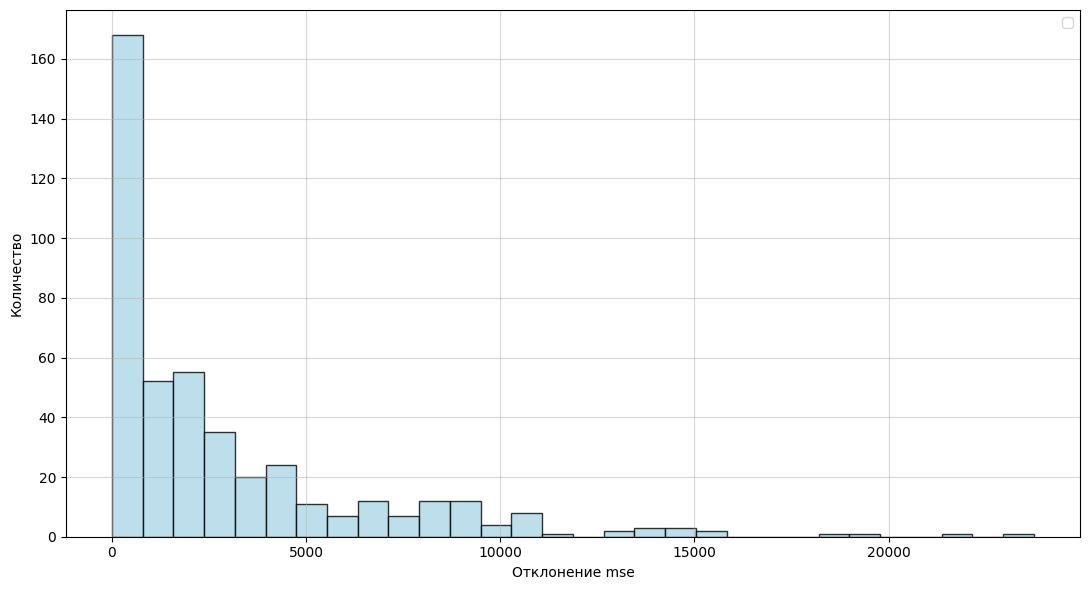

In [238]:
ridge = Ridge(alpha_best)
x = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)
ridge.fit(x,y)
predict = ridge.predict(x)
errors = (predict - y) ** 2
plt.figure(figsize=(11,6))
plt.hist(errors,bins=30,alpha=0.8,color="lightblue",edgecolor="black")
plt.xlabel("Отклонение mse")
plt.ylabel("Количество")
plt.grid(True, alpha=0.5)
plt.legend()

plt.tight_layout()
plt.show()
# k1 = (mean_squared_error(predict,y_train))
predict = ridge.predict(X_test)
k1 = sqrt(mean_squared_error(y_test,predict))

Попробуйте удалить объекты-выбросы из обучающей выборки (что считать или не считать выбросами на ваше усмотрение). Обучите модель заново и посмотрите на качество на отложенной выборке (учитывайте, что там тоже могут быть выбросы, с которыми вы ничего не можете сделать). Стало ли лучше? Чем вы можете объяснить это?

In [239]:
Max_error = 10000
X_train_new = []
Y_train_new = []
cnt = 0
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=241)

for i in range(len(x)):
    if (errors[i] < Max_error):
        X_train_new.append(x[i])
        Y_train_new.append(y[i])
ridge = Ridge(alpha_best)
ridge.fit(X_train_new,Y_train_new)
predict = ridge.predict(X_test)
k2 = sqrt(mean_squared_error(y_test,predict))
print("MSE")
print("Отклонение с выбросами было равно :", k1)
print("Отклонение без выбросов было равно :", k2)
print(cnt)


MSE
Отклонение с выбросами было равно : 52.85710045516342
Отклонение без выбросов было равно : 50.796381558602036
0


# Отчет

Я познакомился с оптимизациями линейной регрессии с помощью регулязаторов Lasso и Ridge, а также узнал о метриках качества в задчах регрессии.
Я подобрал лучший коэфицент регуляризации по разным метрикам(RMSE,MAE,R^2).А также построил зависимость потери по метрикам от коэфциента регулязации.Заметим, что от коэфицента регулязации не сильно зависят потери по метрикам RMSE и MAE.

Во втором задании я построил гистограмиу , которая показывает выбросы по метрики mse. После удаления выбросов можем заметить, что наша модель стала работать лучше.

В итоге можно сказать, что исключение выбросов улучшают предсказания нашей модели.